#### Import libraries

In [22]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("white")
sns.set_context("paper")

#### Get data via csv.

In [2]:
ls

AccuracyTest_2022_Mar_25_1603.csv
accuracyTestForTask.ipynb
cedrus_util.py
Example.png
experiment.py
generateX0Trial.py
IM2_2022_Apr_01_1429.csv
pattyL_2022-04-01_12h40.56.806.csv
PL_2022-03-31_13h48.24.644.csv
__pycache__/
SH_2022_Mar_22_1559.csv
Shane_2022_Mar_29_1356.csv
testChain_2022_Mar_28_1455.csv
testDataChain_2022_Mar_28_1654.csv
testDataChainProbabilities_2022_Mar_28_1702.csv


In [3]:
data = pd.read_csv('pattyL_2022-04-01_12h40.56.806.csv')
data

,Unnamed: 0,Participant ID,Session,gender:,age,left-handed,date,exp name,Experiment Start Time,Experiment End Time,Experiment Data
0,0,pattyL,1,female,20,False,2022-04-01_12h40.56.806,Letter-Biased Task,0.002861,1.454291e+06,"{'Stim Type': 'Instructions', 'Start Time (ms)..."
1,1,pattyL,1,female,20,False,2022-04-01_12h40.56.806,Letter-Biased Task,0.002861,1.454291e+06,"{'Trial': 0, 'totalStimuliDisplay': 1, 'Stim T..."
2,2,pattyL,1,female,20,False,2022-04-01_12h40.56.806,Letter-Biased Task,0.002861,1.454291e+06,"{'Trial': 0, 'totalStimuliDisplay': None, 'Sti..."
3,3,pattyL,1,female,20,False,2022-04-01_12h40.56.806,Letter-Biased Task,0.002861,1.454291e+06,"{'Trial': 0, 'totalStimuliDisplay': 2, 'Stim T..."
4,4,pattyL,1,female,20,False,2022-04-01_12h40.56.806,Letter-Biased Task,0.002861,1.454291e+06,"{'Trial': 0, 'totalStimuliDisplay': None, 'Sti..."
...,...,...,...,...,...,...,...,...,...,...,...
1624,1624,pattyL,1,female,20,False,2022-04-01_12h40.56.806,Letter-Biased Task,0.002861,1.454291e+06,"{'Trial': 99, 'totalStimuliDisplay': 1, 'Stim ..."
1625,1625,pattyL,1,female,20,False,2022-04-01_12h40.56.806,Letter-Biased Task,0.002861,1.454291e+06,"{'Trial': 99, 'totalStimuliDisplay': None, 'St..."
1626,1626,pattyL,1,female,20,False,2022-04-01_12h40.56.806,Letter-Biased Task,0.002861,1.454291e+06,"{'Trial': 99, 'totalStimuliDisplay': 2, 'Stim ..."
1627,1627,pattyL,1,female,20,False,2022-04-01_12h40.56.806,Letter-Biased Task,0.002861,1.454291e+06,"{'Trial': 99, 'totalStimuliDisplay': None, 'St..."


#### Checking for appropriate time length of experiment.

-- Observed that it took a little over 11 minutes and 30 seconds to finish 100 trials.

In [4]:
(data['Experiment End Time'][0] / 1000) / 60

24.23818933169047

#### Extract actual trial-to-trial data

In [5]:
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_rows', None)

In [6]:
dfLength = len(data['Experiment Data'])
data['Experiment Data'] = data['Experiment Data'].str.replace("\'", "\"")
data['Experiment Data'] = data['Experiment Data'].str.replace("[", "")
data['Experiment Data'] = data['Experiment Data'].str.replace("]", "")
data['Experiment Data'] = data['Experiment Data'].str.replace("None", "\"None\"")
data['Experiment Data'] = data['Experiment Data'].str.replace("True", "\"True\"")
data['Experiment Data'] = data['Experiment Data'].str.replace("False", "\"False\"")

In [7]:
extractedData = [json.loads(trialInfo) for trialInfo in data['Experiment Data'].values ]

In [8]:
trialsDf = pd.DataFrame(extractedData)
trialsDf['Correct'] = trialsDf['Correct'].map({'True': True, 'False': False})
display(trialsDf)

,Stim Type,Start Time (ms),Total Time (ms),CEDRUS Total Time (ms),Total Frames,Trial,totalStimuliDisplay,Probability of 0,Total 0s,Response,Reaction Time (ms),CEDRUS Total Time (ms) Reaction Time (ms),Reaction Time (frames),Correct,CEDRUS Reaction Time (ms)
0,Instructions,5.452299e+01,29503.112078,29495.0,46190,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,X0,2.997229e+04,351.104975,NaN,601,0.0,1,0.65,25.0,NaN,NaN,NaN,NaN,NaN,NaN
2,opt,3.032678e+04,5965.101004,NaN,7321,0.0,None,0.65,NaN,3.0,5965.101004,5.965101,7321.0,NaN,NaN
3,X0,3.669431e+04,367.152929,NaN,601,0.0,2,0.65,22.0,NaN,NaN,NaN,NaN,NaN,NaN
4,opt,3.706448e+04,1259.040117,NaN,1546,0.0,None,0.65,NaN,3.0,1259.040117,1.259040,1546.0,NaN,NaN
5,X0,3.872492e+04,350.903034,NaN,601,0.0,3,0.65,27.0,NaN,NaN,NaN,NaN,NaN,NaN
6,opt,3.907885e+04,1068.413019,NaN,1307,0.0,None,0.65,NaN,3.0,1068.413019,1.068413,1307.0,NaN,NaN
7,X0,4.059276e+04,350.427866,NaN,601,0.0,4,0.65,24.0,NaN,NaN,NaN,NaN,NaN,NaN
8,opt,4.094626e+04,3392.644882,NaN,4153,0.0,None,0.65,NaN,3.0,3392.644882,3.392645,4153.0,NaN,NaN
9,X0,4.473816e+04,351.058960,NaN,601,0.0,5,0.65,26.0,NaN,NaN,NaN,NaN,NaN,NaN


#### Obtain insight by extracting response information

In [9]:
responsesDf = trialsDf[trialsDf['Stim Type'] == 'response']
print("Percent Correct:", responsesDf['Correct'].sum() / len(responsesDf['Correct']))
display(responsesDf)

Percent Correct: 0.88


,Stim Type,Start Time (ms),Total Time (ms),CEDRUS Total Time (ms),Total Frames,Trial,totalStimuliDisplay,Probability of 0,Total 0s,Response,Reaction Time (ms),CEDRUS Total Time (ms) Reaction Time (ms),Reaction Time (frames),Correct,CEDRUS Reaction Time (ms)
13,response,4.787703e+04,2770.495176,NaN,3424,0.0,6,0.65,NaN,3.0,828.135967,NaN,1020.0,True,818.0
34,response,6.617654e+04,2711.635828,NaN,3363,1.0,10,0.55,NaN,3.0,781.008959,NaN,959.0,True,777.0
57,response,8.868391e+04,2651.540995,NaN,3280,2.0,11,0.60,NaN,3.0,716.469049,NaN,876.0,True,704.0
70,response,1.005369e+05,2521.626949,NaN,3127,3.0,6,0.60,NaN,3.0,589.054823,NaN,723.0,True,574.0
87,response,1.155896e+05,9552.695990,NaN,11802,4.0,8,0.65,NaN,3.0,7627.556086,NaN,9398.0,True,7612.0
100,response,1.378729e+05,3126.892090,NaN,3846,5.0,6,0.55,NaN,2.0,1180.377007,NaN,1442.0,False,1170.0
109,response,1.490069e+05,3702.918053,NaN,4584,6.0,4,0.40,NaN,2.0,1772.193909,NaN,2180.0,True,1757.0
114,response,1.563173e+05,2914.568901,NaN,3620,7.0,2,0.35,NaN,2.0,988.054991,NaN,1216.0,True,971.0
127,response,1.683302e+05,3136.475086,NaN,3872,8.0,6,0.45,NaN,2.0,1196.830034,NaN,1468.0,True,1187.0
134,response,1.772729e+05,3405.723095,NaN,4207,9.0,3,0.65,NaN,3.0,1468.548059,NaN,1803.0,True,1462.0


In [10]:
total0sList = []
for i in range(len(responsesDf)):
    x0forResponse = trialsDf[(trialsDf['Trial'] == i) & (trialsDf['Stim Type'] == 'X0')]
    total0sList.append(x0forResponse['Total 0s'].values)
responsesDf['Total 0s'] = total0sList
responsesDf['Expected 0s'] = responsesDf['Probability of 0'] * 40
responsesDf['Average 0s'] = responsesDf['Total 0s'].map(lambda x: x.mean())
responsesDf

,Stim Type,Start Time (ms),Total Time (ms),CEDRUS Total Time (ms),Total Frames,Trial,totalStimuliDisplay,Probability of 0,Total 0s,Response,Reaction Time (ms),CEDRUS Total Time (ms) Reaction Time (ms),Reaction Time (frames),Correct,CEDRUS Reaction Time (ms),Expected 0s,Average 0s
13,response,4.787703e+04,2770.495176,NaN,3424,0.0,6,0.65,"[25.0, 22.0, 27.0, 24.0, 26.0, 29.0]",3.0,828.135967,NaN,1020.0,True,818.0,26.0,25.500000
34,response,6.617654e+04,2711.635828,NaN,3363,1.0,10,0.55,"[19.0, 27.0, 19.0, 18.0, 29.0, 24.0, 27.0, 25....",3.0,781.008959,NaN,959.0,True,777.0,22.0,23.500000
57,response,8.868391e+04,2651.540995,NaN,3280,2.0,11,0.60,"[23.0, 24.0, 23.0, 21.0, 22.0, 28.0, 23.0, 25....",3.0,716.469049,NaN,876.0,True,704.0,24.0,24.454545
70,response,1.005369e+05,2521.626949,NaN,3127,3.0,6,0.60,"[25.0, 23.0, 23.0, 23.0, 25.0, 28.0]",3.0,589.054823,NaN,723.0,True,574.0,24.0,24.500000
87,response,1.155896e+05,9552.695990,NaN,11802,4.0,8,0.65,"[27.0, 31.0, 21.0, 22.0, 24.0, 26.0, 23.0, 28.0]",3.0,7627.556086,NaN,9398.0,True,7612.0,26.0,25.250000
100,response,1.378729e+05,3126.892090,NaN,3846,5.0,6,0.55,"[23.0, 23.0, 13.0, 22.0, 22.0, 21.0]",2.0,1180.377007,NaN,1442.0,False,1170.0,22.0,20.666667
109,response,1.490069e+05,3702.918053,NaN,4584,6.0,4,0.40,"[16.0, 15.0, 15.0, 14.0]",2.0,1772.193909,NaN,2180.0,True,1757.0,16.0,15.000000
114,response,1.563173e+05,2914.568901,NaN,3620,7.0,2,0.35,"[15.0, 9.0]",2.0,988.054991,NaN,1216.0,True,971.0,14.0,12.000000
127,response,1.683302e+05,3136.475086,NaN,3872,8.0,6,0.45,"[17.0, 22.0, 21.0, 14.0, 11.0, 11.0]",2.0,1196.830034,NaN,1468.0,True,1187.0,18.0,16.000000
134,response,1.772729e+05,3405.723095,NaN,4207,9.0,3,0.65,"[25.0, 29.0, 31.0]",3.0,1468.548059,NaN,1803.0,True,1462.0,26.0,28.333333


In [11]:
probabilityBiasof0 = np.sort(responsesDf['Probability of 0'].unique())

In [12]:
percentCorrect = []
numberInstances = []
for i in probabilityBiasof0:
    print('Probability:', i)
    df = responsesDf[responsesDf['Probability of 0'] == i]
    print('Number of Instances:', len(df))
    numberInstances.append(len(df))
    print('Percentage Correct', df['Correct'].mean())
    display(df)
    percentCorrect.append(df['Correct'].mean())

Probability: 0.35
Number of Instances: 15
Percentage Correct 0.8666666666666667


,Stim Type,Start Time (ms),Total Time (ms),CEDRUS Total Time (ms),Total Frames,Trial,totalStimuliDisplay,Probability of 0,Total 0s,Response,Reaction Time (ms),CEDRUS Total Time (ms) Reaction Time (ms),Reaction Time (frames),Correct,CEDRUS Reaction Time (ms),Expected 0s,Average 0s
114,response,1.563173e+05,2914.568901,NaN,3620,7.0,2,0.35,"[15.0, 9.0]",2.0,988.054991,NaN,1216.0,True,971.0,14.0,12.000000
321,response,3.698710e+05,3390.620947,NaN,4190,22.0,3,0.35,"[7.0, 17.0, 13.0]",2.0,1452.702999,NaN,1786.0,True,1445.0,14.0,12.333333
326,response,3.760461e+05,3633.020878,NaN,4502,23.0,2,0.35,"[12.0, 8.0]",2.0,1708.326817,NaN,2098.0,True,1694.0,14.0,10.000000
478,response,5.194561e+05,3110.980034,NaN,3855,33.0,1,0.35,[9.0],2.0,1180.840015,NaN,1451.0,True,1178.0,14.0,9.000000
543,response,5.714611e+05,3263.088226,NaN,4035,36.0,1,0.35,[10.0],2.0,1324.066162,NaN,1631.0,True,1310.0,14.0,10.000000
582,response,6.071490e+05,2609.675884,NaN,3243,39.0,3,0.35,"[8.0, 14.0, 10.0]",3.0,685.011864,NaN,839.0,False,668.0,14.0,10.666667
694,response,7.023922e+05,2908.422947,NaN,3596,45.0,14,0.35,"[16.0, 15.0, 18.0, 11.0, 13.0, 18.0, 17.0, 18....",2.0,972.714901,NaN,1192.0,True,959.0,14.0,15.428571
1058,response,9.761263e+05,2670.516968,NaN,3306,59.0,3,0.35,"[17.0, 13.0, 13.0]",2.0,732.594967,NaN,902.0,True,729.0,14.0,14.333333
1065,response,9.839329e+05,3155.249119,NaN,3916,60.0,3,0.35,"[11.0, 18.0, 15.0]",2.0,1228.581190,NaN,1512.0,True,1217.0,14.0,14.666667
1235,response,1.118544e+06,2748.890877,NaN,3402,68.0,11,0.35,"[19.0, 18.0, 14.0, 12.0, 11.0, 19.0, 11.0, 12....",2.0,812.525988,NaN,998.0,True,805.0,14.0,14.363636


Probability: 0.4
Number of Instances: 17
Percentage Correct 0.8823529411764706


,Stim Type,Start Time (ms),Total Time (ms),CEDRUS Total Time (ms),Total Frames,Trial,totalStimuliDisplay,Probability of 0,Total 0s,Response,Reaction Time (ms),CEDRUS Total Time (ms) Reaction Time (ms),Reaction Time (frames),Correct,CEDRUS Reaction Time (ms),Expected 0s,Average 0s
109,response,1.490069e+05,3702.918053,NaN,4584,6.0,4,0.4,"[16.0, 15.0, 15.0, 14.0]",2.0,1772.193909,NaN,2180.0,True,1757.0,16.0,15.000000
143,response,1.878618e+05,3187.050104,NaN,3929,10.0,4,0.4,"[21.0, 17.0, 14.0, 12.0]",2.0,1245.529175,NaN,1525.0,True,1233.0,16.0,16.000000
191,response,2.457540e+05,2889.483929,NaN,3555,14.0,2,0.4,"[17.0, 11.0]",2.0,940.784931,NaN,1151.0,True,930.0,16.0,14.000000
468,response,5.038595e+05,2873.010874,NaN,3557,31.0,14,0.4,"[16.0, 16.0, 19.0, 19.0, 17.0, 18.0, 22.0, 17....",3.0,940.885067,NaN,1153.0,False,935.0,16.0,16.000000
511,response,5.431627e+05,4187.263966,NaN,5178,34.0,16,0.4,"[19.0, 14.0, 14.0, 13.0, 13.0, 17.0, 20.0, 12....",2.0,2252.876997,NaN,2774.0,True,2237.0,16.0,15.187500
591,response,6.160273e+05,2934.683800,NaN,3617,40.0,4,0.4,"[18.0, 20.0, 12.0, 12.0]",2.0,988.550901,NaN,1213.0,True,983.0,16.0,15.500000
658,response,6.689437e+05,2869.207144,NaN,3561,43.0,4,0.4,"[18.0, 15.0, 14.0, 17.0]",2.0,940.412998,NaN,1157.0,True,929.0,16.0,16.000000
806,response,7.925012e+05,2768.466949,NaN,3445,49.0,9,0.4,"[16.0, 20.0, 16.0, 11.0, 17.0, 19.0, 15.0, 17....",2.0,844.734907,NaN,1041.0,True,830.0,16.0,16.222222
890,response,8.594308e+05,3227.768898,NaN,3993,53.0,6,0.4,"[16.0, 14.0, 12.0, 14.0, 12.0, 11.0]",2.0,1292.966843,NaN,1589.0,True,1290.0,16.0,13.166667
963,response,9.134201e+05,2661.393166,NaN,3304,56.0,2,0.4,"[22.0, 14.0]",2.0,732.043028,NaN,900.0,True,722.0,16.0,18.000000


Probability: 0.45
Number of Instances: 16
Percentage Correct 0.9375


,Stim Type,Start Time (ms),Total Time (ms),CEDRUS Total Time (ms),Total Frames,Trial,totalStimuliDisplay,Probability of 0,Total 0s,Response,Reaction Time (ms),CEDRUS Total Time (ms) Reaction Time (ms),Reaction Time (frames),Correct,CEDRUS Reaction Time (ms),Expected 0s,Average 0s
127,response,1.683302e+05,3136.475086,NaN,3872,8.0,6,0.45,"[17.0, 22.0, 21.0, 14.0, 11.0, 11.0]",2.0,1196.830034,NaN,1468.0,True,1187.0,18.0,16.000000
186,response,2.395475e+05,3026.726961,NaN,3731,13.0,10,0.45,"[17.0, 19.0, 18.0, 18.0, 12.0, 20.0, 17.0, 23....",2.0,1084.343910,NaN,1327.0,True,1074.0,18.0,17.400000
342,response,3.935619e+05,3097.820044,NaN,3840,25.0,4,0.45,"[20.0, 18.0, 23.0, 13.0]",2.0,1164.737940,NaN,1436.0,True,1149.0,18.0,18.500000
365,response,4.122785e+05,3306.660891,NaN,4114,26.0,11,0.45,"[18.0, 14.0, 21.0, 24.0, 21.0, 17.0, 19.0, 13....",2.0,1388.258934,NaN,1710.0,True,1387.0,18.0,18.000000
387,response,4.367058e+05,3217.516184,NaN,3993,28.0,2,0.45,"[20.0, 15.0]",2.0,1291.923046,NaN,1589.0,True,1287.0,18.0,17.500000
552,response,5.791708e+05,2919.091940,NaN,3617,37.0,4,0.45,"[22.0, 19.0, 19.0, 17.0]",2.0,988.593102,NaN,1213.0,True,985.0,18.0,19.250000
846,response,8.246060e+05,2916.679144,NaN,3622,51.0,10,0.45,"[19.0, 16.0, 18.0, 16.0, 23.0, 20.0, 21.0, 15....",2.0,988.993168,NaN,1218.0,True,978.0,18.0,18.000000
877,response,8.456099e+05,2928.795815,NaN,3616,52.0,15,0.45,"[19.0, 18.0, 21.0, 13.0, 16.0, 19.0, 17.0, 20....",2.0,988.715887,NaN,1212.0,True,974.0,18.0,17.600000
911,response,8.776833e+05,3181.591034,NaN,3934,54.0,10,0.45,"[17.0, 21.0, 19.0, 18.0, 17.0, 19.0, 20.0, 19....",2.0,1243.983030,NaN,1530.0,True,1228.0,18.0,18.100000
1051,response,9.693921e+05,2847.418070,NaN,3514,58.0,19,0.45,"[16.0, 20.0, 17.0, 21.0, 18.0, 18.0, 21.0, 16....",2.0,908.783913,NaN,1110.0,True,905.0,18.0,17.947368


Probability: 0.55
Number of Instances: 21
Percentage Correct 0.7142857142857143


,Stim Type,Start Time (ms),Total Time (ms),CEDRUS Total Time (ms),Total Frames,Trial,totalStimuliDisplay,Probability of 0,Total 0s,Response,Reaction Time (ms),CEDRUS Total Time (ms) Reaction Time (ms),Reaction Time (frames),Correct,CEDRUS Reaction Time (ms),Expected 0s,Average 0s
34,response,6.617654e+04,2711.635828,NaN,3363,1.0,10,0.55,"[19.0, 27.0, 19.0, 18.0, 29.0, 24.0, 27.0, 25....",3.0,781.008959,NaN,959.0,True,777.0,22.0,23.500000
100,response,1.378729e+05,3126.892090,NaN,3846,5.0,6,0.55,"[23.0, 23.0, 13.0, 22.0, 22.0, 21.0]",2.0,1180.377007,NaN,1442.0,False,1170.0,22.0,20.666667
283,response,3.273363e+05,3008.162975,NaN,3717,18.0,15,0.55,"[18.0, 22.0, 17.0, 21.0, 21.0, 21.0, 23.0, 22....",2.0,1068.516016,NaN,1313.0,False,1065.0,22.0,20.466667
314,response,3.602093e+05,2903.740883,NaN,3577,21.0,6,0.55,"[20.0, 20.0, 22.0, 24.0, 24.0, 23.0]",3.0,956.265926,NaN,1173.0,True,940.0,22.0,22.166667
333,response,3.848756e+05,3263.891935,NaN,4052,24.0,3,0.55,"[22.0, 21.0, 17.0]",2.0,1340.956926,NaN,1648.0,False,1339.0,22.0,20.000000
382,response,4.304024e+05,3318.997860,NaN,4112,27.0,8,0.55,"[21.0, 23.0, 23.0, 24.0, 24.0, 22.0, 24.0, 24.0]",3.0,1389.180899,NaN,1708.0,True,1387.0,22.0,23.125000
606,response,6.280244e+05,3114.131927,NaN,3856,41.0,7,0.55,"[15.0, 23.0, 21.0, 20.0, 17.0, 22.0, 21.0]",2.0,1180.752993,NaN,1452.0,False,1171.0,22.0,19.857143
649,response,6.619850e+05,2153.577805,NaN,2673,42.0,21,0.55,"[21.0, 26.0, 25.0, 25.0, 26.0, 22.0, 23.0, 20....",2.0,220.764875,NaN,269.0,False,214.0,22.0,23.333333
665,response,6.774223e+05,2888.617039,NaN,3579,44.0,3,0.55,"[24.0, 19.0, 27.0]",3.0,956.600904,NaN,1175.0,True,941.0,22.0,23.333333
745,response,7.449273e+05,3067.483902,NaN,3795,46.0,25,0.55,"[19.0, 20.0, 23.0, 24.0, 24.0, 26.0, 24.0, 22....",3.0,1132.797003,NaN,1391.0,True,1122.0,22.0,21.920000


Probability: 0.6
Number of Instances: 12
Percentage Correct 0.9166666666666666


,Stim Type,Start Time (ms),Total Time (ms),CEDRUS Total Time (ms),Total Frames,Trial,totalStimuliDisplay,Probability of 0,Total 0s,Response,Reaction Time (ms),CEDRUS Total Time (ms) Reaction Time (ms),Reaction Time (frames),Correct,CEDRUS Reaction Time (ms),Expected 0s,Average 0s
57,response,8.868391e+04,2651.540995,NaN,3280,2.0,11,0.6,"[23.0, 24.0, 23.0, 21.0, 22.0, 28.0, 23.0, 25....",3.0,716.469049,NaN,876.0,True,704.0,24.0,24.454545
70,response,1.005369e+05,2521.626949,NaN,3127,3.0,6,0.6,"[25.0, 23.0, 23.0, 23.0, 25.0, 28.0]",3.0,589.054823,NaN,723.0,True,574.0,24.0,24.500000
165,response,2.145284e+05,3675.614119,NaN,4534,12.0,6,0.6,"[22.0, 24.0, 30.0, 24.0, 22.0, 30.0]",3.0,1740.673065,NaN,2130.0,True,1735.0,24.0,25.333333
218,response,2.685493e+05,3393.914938,NaN,4177,15.0,13,0.6,"[23.0, 25.0, 20.0, 22.0, 19.0, 26.0, 24.0, 26....",3.0,1452.757835,NaN,1773.0,True,1437.0,24.0,23.846154
432,response,4.706506e+05,3114.773989,NaN,3849,29.0,22,0.6,"[24.0, 27.0, 24.0, 22.0, 23.0, 27.0, 30.0, 29....",3.0,1180.573940,NaN,1445.0,True,1170.0,24.0,24.136364
439,response,4.778652e+05,2879.940033,NaN,3559,30.0,3,0.6,"[21.0, 23.0, 23.0]",3.0,940.194130,NaN,1155.0,True,935.0,24.0,22.333333
575,response,5.981747e+05,2841.534853,NaN,3520,38.0,11,0.6,"[28.0, 28.0, 22.0, 25.0, 24.0, 25.0, 19.0, 20....",3.0,908.891916,NaN,1116.0,True,893.0,24.0,24.181818
958,response,9.081723e+05,2591.166019,NaN,3205,55.0,23,0.6,"[22.0, 24.0, 30.0, 17.0, 25.0, 21.0, 27.0, 21....",3.0,652.987957,NaN,801.0,True,648.0,24.0,23.608696
1288,response,1.163046e+06,2709.876060,NaN,3339,73.0,4,0.6,"[24.0, 27.0, 24.0, 27.0]",3.0,765.562057,NaN,935.0,True,754.0,24.0,25.500000
1558,response,1.390900e+06,2730.076075,NaN,3380,91.0,2,0.6,"[22.0, 27.0]",3.0,796.561956,NaN,976.0,True,795.0,24.0,24.500000


Probability: 0.65
Number of Instances: 19
Percentage Correct 1.0


,Stim Type,Start Time (ms),Total Time (ms),CEDRUS Total Time (ms),Total Frames,Trial,totalStimuliDisplay,Probability of 0,Total 0s,Response,Reaction Time (ms),CEDRUS Total Time (ms) Reaction Time (ms),Reaction Time (frames),Correct,CEDRUS Reaction Time (ms),Expected 0s,Average 0s
13,response,4.787703e+04,2770.495176,NaN,3424,0.0,6,0.65,"[25.0, 22.0, 27.0, 24.0, 26.0, 29.0]",3.0,828.135967,NaN,1020.0,True,818.0,26.0,25.500000
87,response,1.155896e+05,9552.695990,NaN,11802,4.0,8,0.65,"[27.0, 31.0, 21.0, 22.0, 24.0, 26.0, 23.0, 28.0]",3.0,7627.556086,NaN,9398.0,True,7612.0,26.0,25.250000
134,response,1.772729e+05,3405.723095,NaN,4207,9.0,3,0.65,"[25.0, 29.0, 31.0]",3.0,1468.548059,NaN,1803.0,True,1462.0,26.0,28.333333
152,response,2.024831e+05,3422.069073,NaN,4232,11.0,4,0.65,"[25.0, 25.0, 29.0, 29.0]",3.0,1484.418869,NaN,1828.0,True,1473.0,26.0,27.000000
231,response,2.842102e+05,3082.189083,NaN,3781,16.0,6,0.65,"[28.0, 23.0, 26.0, 27.0, 26.0, 29.0]",3.0,1132.144928,NaN,1377.0,True,1127.0,26.0,26.500000
252,response,3.047813e+05,3186.761856,NaN,3934,17.0,10,0.65,"[23.0, 30.0, 31.0, 26.0, 24.0, 25.0, 29.0, 22....",3.0,1244.708061,NaN,1530.0,True,1235.0,26.0,26.200000
290,response,3.352066e+05,2952.270985,NaN,3632,19.0,3,0.65,"[26.0, 22.0, 27.0]",3.0,1004.913092,NaN,1228.0,True,997.0,26.0,25.000000
301,response,3.487552e+05,2930.037975,NaN,3619,20.0,5,0.65,"[28.0, 32.0, 22.0, 29.0, 26.0]",3.0,989.112139,NaN,1215.0,True,977.0,26.0,27.400000
475,response,5.146571e+05,2462.534904,NaN,3048,32.0,3,0.65,"[29.0, 26.0, 30.0]",3.0,525.039911,NaN,644.0,True,516.0,26.0,28.333333
540,response,5.652860e+05,2997.118950,NaN,3711,35.0,14,0.65,"[25.0, 24.0, 27.0, 30.0, 21.0, 26.0, 25.0, 28....",3.0,1068.659067,NaN,1307.0,True,1065.0,26.0,26.285714


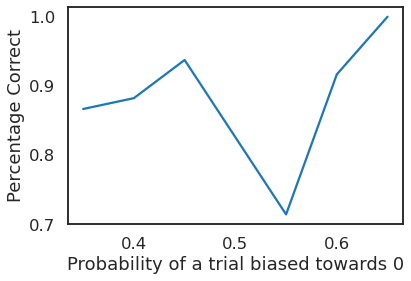

In [13]:
plt.figure()
plt.plot(probabilityBiasof0, percentCorrect)
plt.xlabel('Probability of a trial biased towards 0')
plt.ylabel('Percentage Correct')
plt.show()

In [14]:
responsesDf = trialsDf[(trialsDf['Stim Type'] == 'response') & (trialsDf['Probability of 0'] >= .35) & (trialsDf['Probability of 0'] <= .65)]
print("Percent Correct:", responsesDf['Correct'].sum() / len(responsesDf['Correct']))
display(responsesDf)

Percent Correct: 0.88


,Stim Type,Start Time (ms),Total Time (ms),CEDRUS Total Time (ms),Total Frames,Trial,totalStimuliDisplay,Probability of 0,Total 0s,Response,Reaction Time (ms),CEDRUS Total Time (ms) Reaction Time (ms),Reaction Time (frames),Correct,CEDRUS Reaction Time (ms)
13,response,4.787703e+04,2770.495176,NaN,3424,0.0,6,0.65,NaN,3.0,828.135967,NaN,1020.0,True,818.0
34,response,6.617654e+04,2711.635828,NaN,3363,1.0,10,0.55,NaN,3.0,781.008959,NaN,959.0,True,777.0
57,response,8.868391e+04,2651.540995,NaN,3280,2.0,11,0.60,NaN,3.0,716.469049,NaN,876.0,True,704.0
70,response,1.005369e+05,2521.626949,NaN,3127,3.0,6,0.60,NaN,3.0,589.054823,NaN,723.0,True,574.0
87,response,1.155896e+05,9552.695990,NaN,11802,4.0,8,0.65,NaN,3.0,7627.556086,NaN,9398.0,True,7612.0
100,response,1.378729e+05,3126.892090,NaN,3846,5.0,6,0.55,NaN,2.0,1180.377007,NaN,1442.0,False,1170.0
109,response,1.490069e+05,3702.918053,NaN,4584,6.0,4,0.40,NaN,2.0,1772.193909,NaN,2180.0,True,1757.0
114,response,1.563173e+05,2914.568901,NaN,3620,7.0,2,0.35,NaN,2.0,988.054991,NaN,1216.0,True,971.0
127,response,1.683302e+05,3136.475086,NaN,3872,8.0,6,0.45,NaN,2.0,1196.830034,NaN,1468.0,True,1187.0
134,response,1.772729e+05,3405.723095,NaN,4207,9.0,3,0.65,NaN,3.0,1468.548059,NaN,1803.0,True,1462.0


In [15]:
getCounts = lambda probability: [print((responsesDf['Probability of 0'] == p).sum()) for p in probability]
    
    
getCounts([0.35, 0.4 , 0.45, 0.55, 0.6 , 0.65])
percentCorrect

15
17
16
21
12
19


[0.8666666666666667,
 0.8823529411764706,
 0.9375,
 0.7142857142857143,
 0.9166666666666666,
 1.0]

In [16]:
6 * 17

102

In [17]:
probVariability = [0.35, 0.4 , 0.45, 0.55, 0.6 , 0.65]
probVariability

[0.35, 0.4, 0.45, 0.55, 0.6, 0.65]

In [18]:
samples = np.random.choice(probVariability, size = 100)


In [19]:
getSampleCounts = lambda probVariability, samples: [len(samples[samples == p]) for p in probVariability]

In [20]:
counts= getSampleCounts(probVariability, samples)

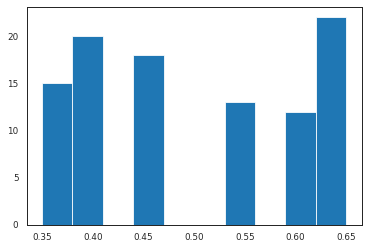

In [23]:
plt.hist(samples)
plt.show()

In [59]:
allProbabiltiesForTrials = (np.ones([17, 6]) * np.array([0.35, 0.4 , 0.45, 0.55, 0.6 , 0.65])).reshape([17 * 6])
np.random.shuffle(allProbabiltiesForTrials)

In [58]:
allProbabiltiesForTrials.shape

(102,)

In [60]:
allProbabiltiesForTrials

array([0.45, 0.6 , 0.6 , 0.6 , 0.4 , 0.45, 0.4 , 0.4 , 0.4 , 0.65, 0.35,
       0.65, 0.65, 0.45, 0.35, 0.4 , 0.4 , 0.4 , 0.45, 0.55, 0.35, 0.6 ,
       0.45, 0.6 , 0.4 , 0.35, 0.45, 0.6 , 0.65, 0.4 , 0.35, 0.65, 0.65,
       0.6 , 0.4 , 0.55, 0.6 , 0.35, 0.35, 0.65, 0.6 , 0.45, 0.65, 0.65,
       0.35, 0.35, 0.4 , 0.35, 0.55, 0.45, 0.65, 0.55, 0.6 , 0.35, 0.35,
       0.45, 0.65, 0.35, 0.45, 0.55, 0.45, 0.4 , 0.45, 0.4 , 0.45, 0.55,
       0.6 , 0.6 , 0.65, 0.55, 0.35, 0.65, 0.4 , 0.35, 0.35, 0.55, 0.6 ,
       0.55, 0.55, 0.4 , 0.55, 0.35, 0.45, 0.55, 0.55, 0.6 , 0.4 , 0.45,
       0.65, 0.6 , 0.55, 0.6 , 0.65, 0.45, 0.45, 0.55, 0.55, 0.4 , 0.65,
       0.65, 0.55, 0.6 ])

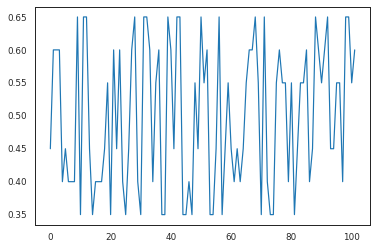

In [61]:
plt.plot(allProbabiltiesForTrials)

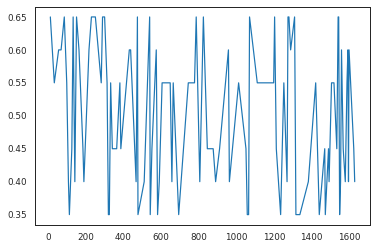

In [62]:
plt.plot(responsesDf['Probability of 0'])